what does the algorithm do?
- the algorithm finds a hyperplane (or decision boundary) which should ideally have the following properties:

    - It creates separation between examples of two classes with a maximum margin
    - Its equation (w.x + b = 0) yields a value ≥ 1 for examples from+ve class and ≤-1 for examples from -ve class
    
What’s our objective in SVM? 
- Our objective is to find a hyperplane that separates +ve and -ve examples with the largest margin while keeping the misclassification as low as possible

How do we achieve this  objective ?
- By minimizig the given cost function
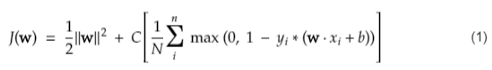


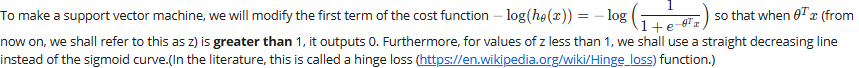

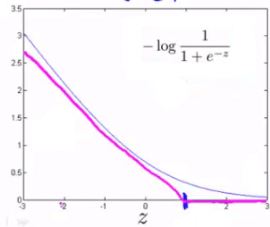 

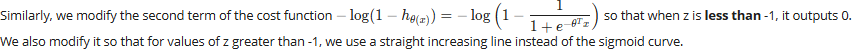

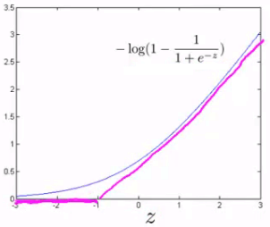

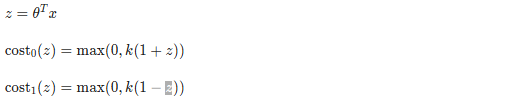

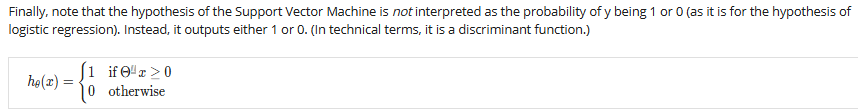

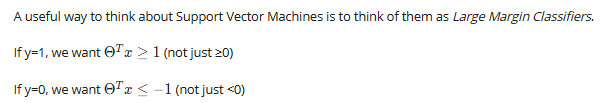

Large Margin Intuition

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0.
In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.

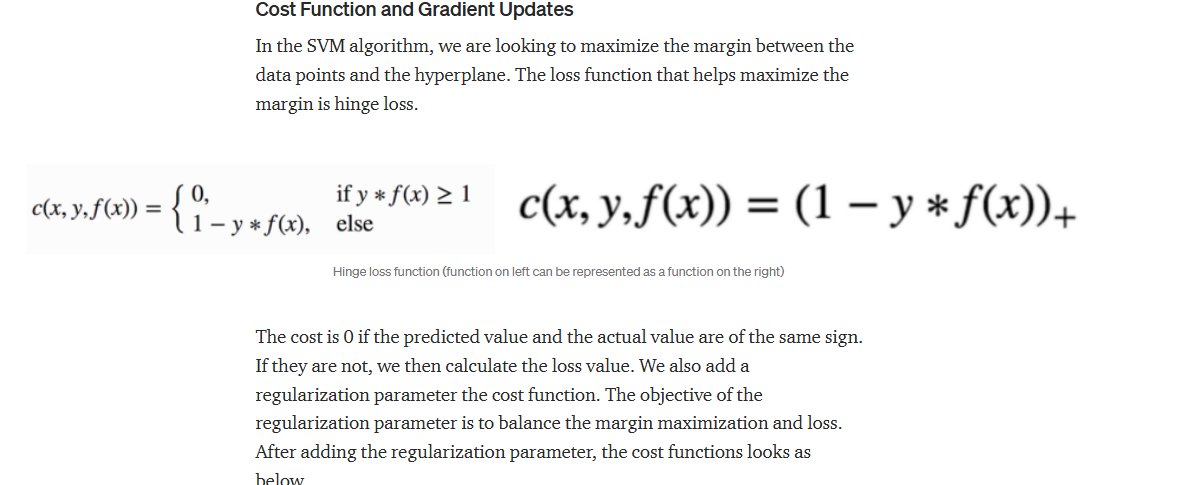

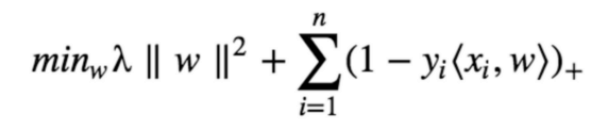

We have converted Y to -1 and 1 for below code

Why do we minimize the cost function? 

Because the cost function is essentially a measure of how bad our model is doing at achieving the objective. If you look closely at J(w), to find it’s minimum, we have to:

    Minimize ∣∣w∣∣² which maximizes margin (2/∣∣w∣∣)
    Minimize the sum of hinge loss which minimizes misclassifications.

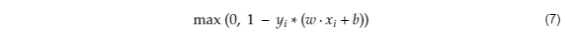Image for post
Image for post
Hinge loss function

Because both of our SVM objectives are achieved by minimizing the cost function, that’s why we minimize it.

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

##  Understanding the margin

##  Key takeaways for me:
1. in the equation 2x+3y+200 , 200 keeps the line at 200th tick on y axis
2. The +1 ,-1 represent the fatness of the line
3. The fatness of our line will be between 0 and 1

##  Implementing Support Vector Machine on heart Disease dataset

In [7]:
df= pd.read_csv('data/post_pca_sample_data.csv').drop('Unnamed: 0',axis=1)
print(df.columns)
df['target']= df['target'].map({0:-1,1:1})
df

Index(['PCA1', 'PCA2', 'target'], dtype='object')


,PCA1,PCA2,target
0,-3.138960,0.660234,-1
1,-2.450244,0.437785,-1
2,2.287502,-3.959193,1
3,1.410568,-2.932735,1
4,-1.812847,4.506603,1
...,...,...,...
995,2.249206,-4.610164,1
996,-2.030388,-2.056233,1
997,4.968573,-4.559152,1
998,-3.536887,7.022070,-1


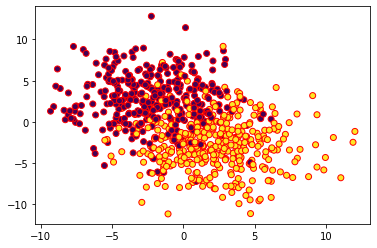

In [8]:
X= df.drop('target',axis=1)
Y= df['target']
train_x,val_x,train_y,val_y= train_test_split(X,Y)
plt.scatter(train_x['PCA1'],train_x['PCA2'],edgecolors='red',c= train_y)

##  Our Objective is to classify the above dataset with maximum margin. I have already preprocessed and applied PCA, I have reduced the dataset to 2 features to ease plotting the data and the SVM line.

<b>
    How can we achieve the above objective ?
</b><br>
    - By reducing the cost function. WHY? because it is a measure of how bad our model is in classifying the data
 

$$ J(\theta) = \frac{1}{2} * ||w||^2 +\underbrace{ \underbrace{C}_\textrm{How much to penalize} \langle \frac{1}{N}\sum \underbrace{max(0, 1- Y *(WX +b)}_\textrm{Missclassification Cost})}_\textrm{Penalty for wrong classification} \rangle $$

if $C$ is large then margin will be thin
<br>
if $C$ is small then margin will be fat

<b3> $$C= \frac{1}{\lambda}$$

$$ \frac{d}{d\theta}J(\theta) = \frac{d}{d\theta} \frac{1}{2} * ||w||^2 + \frac{d}{d\theta} C \langle \frac{1}{N}\sum max(0, 1- Y *(WX +b))\rangle $$
<br>
<br>
$ \frac{d}{d\theta}J(\theta)$  will be $W$ if $C *max(0,1-Y(WX))=0$ otherwise it will be $W - C*Y_i*X_i$

$$ if\space\underbrace{C*max{0,1-y(WX+b)}}_\textrm{ $\frac{dJ}{d\theta} = W_i$ } \space \space \space otherwise \space \space \frac{dJ}{d\theta} =W_i- C*Y_i*X_i$ $$

In [47]:
class support_vector_machine:
    def __init__(self):
        self.N= None
        self.theta= None
        self.b= None
        self.C=None
        self.lr= None
        self.num_iters=None
        
    def initialize_parameters(self,X,Y,C,lr,num_iters,print_):
        print('Intializing parameters..')
        row,col= X.shape
        self.N= row
        self.lr= lr
        self.theta= np.ones(col)
        self.b= 0
        self.C= C
        self.num_iters= num_iters
        if print_:
            print('X:', X.shape,'\nY:',Y.shape)
            print('Theta:',self.theta.shape)

        
    def cost_function(self,X,Y,i,print_):
        f_x= 1- Y*(np.dot(X,self.theta)+ self.b)
        f_x[f_x<0]=0
        loss= self.C * (np.sum(f_x)/self.N)
        cost= 0.5 * np.dot(self.theta,self.theta) +loss
        if print_:
            print(i,'cost:',cost)
        
        
    def find_gradient(self,W,B,x_i,y_i):
        distance= 1- y_i*(np.dot(W,x_i)+ self.b)
        if max(0, distance)== 0:
            dw= W
        else:
            dw= W- (self.C * y_i * x_i)
            
        DW= dw
        
        return DW
    
    def SGD(self,X,Y,print_):
        print('Performing gradient descent..')
        for m in range(self.num_iters):
            for ind,x in enumerate(X.values):
                ascent= self.find_gradient(self.theta,self.b,x,Y.values[ind])
                self.theta = self.theta - self.lr * ascent
                self.b= self.b - self.lr* self.b
            if m %100==0:
                self.cost_function(X,Y,m,print_)
        return self.theta
        print('Gradient Descent finished..')
            
    def fit(self,X,Y,C,lr,num_iters,print_):
        print('-'*15,'Fitting Started..','-'*16)
        print('='*50)
        self.initialize_parameters(X,Y,C,lr,num_iters,print_)
        print('-'*25)
        self.cost_function(X,Y,0,print_)
        print('-'*25)
        self.theta= self.SGD(X,Y,print_)
        print('='*50)
        print('-'*15,'Fitting Ended','-'*20)
    
    def predict(self,X):
        y = np.sign(np.dot(X,self.theta))
        return y
        

In [10]:
# %load Plot.py
def plot_the_line(df_x,df_y,svm):
    h = .02     

    x_min, x_max = df_x['PCA1'].min() - 1, df_x['PCA1'].max() + 1
    y_min, y_max = df_x['PCA2'].min() - 1, df_x['PCA2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    x_min, x_max = df_x['PCA1'].min() - 1, df_x['PCA1'].max() + 1
    y_min, y_max = df_x['PCA2'].min() - 1, df_x['PCA2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z= svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(df_x['PCA1'], df_x['PCA2'], c=df_y.values, alpha=0.8)
    plt.xlabel("PCA 1",fontsize=15)
    plt.ylabel("PCA 2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()


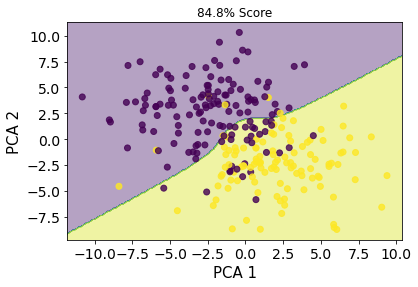

In [17]:
from sklearn.svm import SVC
C=50
lr= 0.01
num_iters=1000
print_=False

svc= SVC(C=C,kernel='poly')
svc.fit(train_x,train_y,)
answer2=svc.predict(val_x)
plt.title(str(accuracy_score(answer2,val_y)*100)+'% Score')
plot_the_line(val_x,val_y,svc)

def linear(self,x,y):
		return np.dot(x.T,y)

	def polynomial(self,x,y):
		return (np.dot(x.T,y) + self.polyconst)**self.degree

	def rbf(self,x,y):
		return np.exp(-1.0*self.gamma*np.dot(np.subtract(x,y).T,np.subtract(x,y)))

	def transform(self,X):
		K = np.zeros([X.shape[0],X.shape[0]])
		for i in range(X.shape[0]):
			for j in range(X.shape[0]):
				K[i,j] = self.kf[self.kernel](X[i],X[j])
		return K

--------------- Fitting Started.. ----------------
Intializing parameters..
-------------------------
-------------------------
Performing gradient descent..
--------------- Fitting Ended --------------------


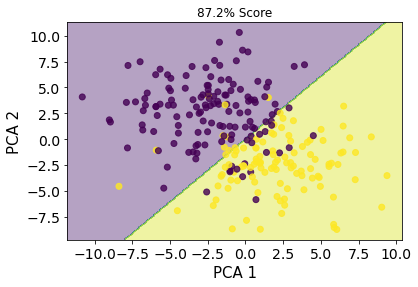

In [48]:
svm= support_vector_machine()
C=1
lr= 0.01
num_iters=1000
print_=False

svm.fit(train_x,train_y,C,lr,num_iters,print_)
answer= svm.predict(val_x)
plt.title(str(accuracy_score(answer,val_y)*100)+'% Score')
plot_the_line(val_x,val_y,svm)